# Database Systems 4020

## Name: Riad Mohammed

### Extra Credit 2

#### 1. (3 points) Create a database named "recipesdb" and a collection named "Recipes" in MongoDB


In [1]:
#pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [1]:
# This program uses pymongo to create a database and perform CRUD operations
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/") # choose the location of your database
mydb = myclient["recipesdb"]



In [4]:
import pymongo
import json

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["recipesdb"]

my_collection = mydb["Recipes"] # create a collection

#inserting data into database

with open("recipeitems.json", encoding="utf8") as json_file:
    for i, line in enumerate(json_file):
        recipe_obj = json.loads(line)
        oid = recipe_obj.pop('_id')['$oid']
        name = recipe_obj.pop('name')
        keys = recipe_obj.keys()
        
        info = {}
        for key in keys:
            info[key] = recipe_obj[key]
        
        insert_result = my_collection.insert_one(
        {    
                "oid": oid,
                "name": name,
                "info": info    
        }
        )

In [6]:
#Testing/Proof of collection
db_collections = mydb.list_collection_names()
if "Recipes" in db_collections:
    print("The collection exists.")

The collection exists.


In [11]:
myclient.list_database_names()

['admin', 'config', 'local', 'recipesdb']

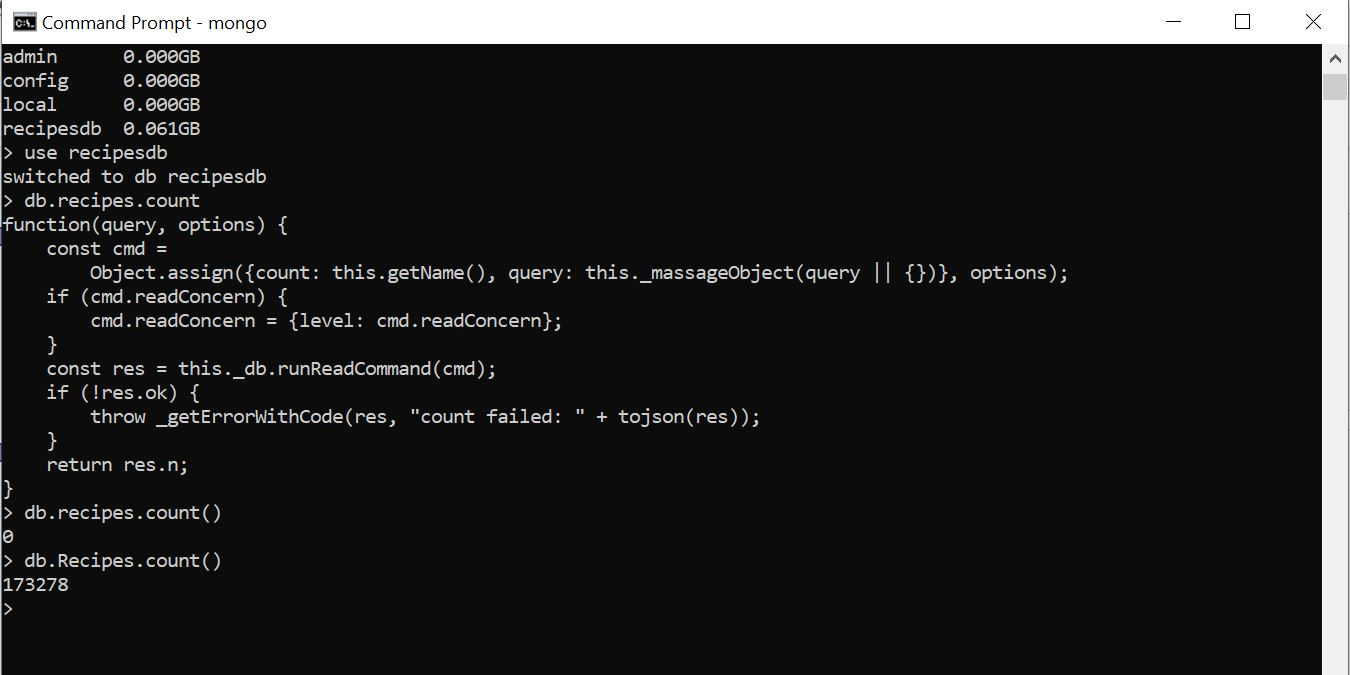

## 2) Query

#### (a) (1 point) Create a query that finds recipes for breakfast foods (the description contains "breakfast" or "Breakfast"). How many are there? (Hint: count the items in the response returned)


In [53]:
import pymongo
import json

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
db = myclient["recipesdb"]

recipe_collection = mydb.get_collection("Recipes")

result_1 = recipe_collection.count_documents({
    "info.description" : { "$regex" : "breakfast|Breakfast"},    

})

print(result_1)



3524


#### (b) (1 point) Issue a query to find out how many of the recipes list "cinnamon/Cinnamon" as an ingredient.

In [54]:
import pymongo
import json

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
db = myclient["recipesdb"]

recipe_collection = mydb.get_collection("Recipes")

result_2 = recipe_collection.count_documents({
    "info.ingredients" : { "$regex" : "cinnamon|Cinnamon"},    

})

print(result_2)

10526


In [55]:
import pymongo
import json

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
db = myclient["recipesdb"]

recipe_collection = mydb.get_collection("Recipes")

result_3 = recipe_collection.count_documents({
    "info.ingredients" : { "$regex" : "cinamon"},    

})

print(result_3)

9
